In [38]:
# STEP 1: Load & Inspect the Dataset

import pandas as pd

# 🧠 Load your dataset (make sure selected_features.csv is in the same folder)
df = pd.read_csv("../data/selected_features.csv")

# ✅ Basic Info
print("🔹 Dataset Loaded Successfully!")
print(f"📦 Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# 🧾 Show column names
print("🔸 Columns in Dataset:")
display(df.columns.tolist())

# 📊 Data types
print("\n🔸 Data Types:")
display(df.dtypes)

# 👀 Preview first 5 rows
print("\n🔹 First 5 Rows of Data:")
display(df.head())

# 🧩 Check for missing values
print("\n🔸 Missing Values per Column:")
display(df.isnull().sum())


🔹 Dataset Loaded Successfully!
📦 Shape: 2000 rows × 16 columns

🔸 Columns in Dataset:


['Waste_Segregation_Level_%',
 'Decomposition_Efficiency_%',
 'Recycling_Rate_%',
 'Hazardous_Waste_Treatment_Compliance',
 'Govt_Compliance_Status',
 'ISO_14001_Certified',
 'Zero_Waste_Landfill_Certified',
 'Waste_to_Energy_Usage',
 'CO2_Emissions_tons_per_year',
 'Methane_Emissions_tons_per_year',
 'Environmental_Fines_Count',
 'Employee_Training_in_Waste_Management',
 'Digital_Waste_Tracking',
 'Frequency_of_Waste_Audit_per_year',
 'Eco_Friendly_Raw_Materials_%',
 'Perfect_Waste_Decomposition_System']


🔸 Data Types:


Waste_Segregation_Level_%                  int64
Decomposition_Efficiency_%                 int64
Recycling_Rate_%                           int64
Hazardous_Waste_Treatment_Compliance      object
Govt_Compliance_Status                    object
ISO_14001_Certified                       object
Zero_Waste_Landfill_Certified             object
Waste_to_Energy_Usage                     object
CO2_Emissions_tons_per_year              float64
Methane_Emissions_tons_per_year          float64
Environmental_Fines_Count                  int64
Employee_Training_in_Waste_Management     object
Digital_Waste_Tracking                    object
Frequency_of_Waste_Audit_per_year          int64
Eco_Friendly_Raw_Materials_%               int64
Perfect_Waste_Decomposition_System         int64
dtype: object


🔹 First 5 Rows of Data:


,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Govt_Compliance_Status,ISO_14001_Certified,Zero_Waste_Landfill_Certified,Waste_to_Energy_Usage,CO2_Emissions_tons_per_year,Methane_Emissions_tons_per_year,Environmental_Fines_Count,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,Perfect_Waste_Decomposition_System
0,67,85,90,Yes,Compliant,Yes,Yes,Yes,88.78,28.83,0,Yes,Yes,11,86,1
1,70,51,28,No,Non-Compliant,No,Yes,No,323.53,253.86,1,Yes,Yes,4,30,0
2,57,41,15,No,Pending,Yes,Yes,Yes,583.45,226.16,9,No,Yes,4,17,0
3,70,60,45,Yes,Non-Compliant,Yes,Yes,Yes,993.65,138.41,4,Yes,No,4,24,0
4,83,90,84,Yes,Compliant,Yes,Yes,Yes,91.08,20.16,0,Yes,Yes,11,68,1



🔸 Missing Values per Column:


Waste_Segregation_Level_%                0
Decomposition_Efficiency_%               0
Recycling_Rate_%                         0
Hazardous_Waste_Treatment_Compliance     0
Govt_Compliance_Status                   0
ISO_14001_Certified                      0
Zero_Waste_Landfill_Certified            0
Waste_to_Energy_Usage                    0
CO2_Emissions_tons_per_year              0
Methane_Emissions_tons_per_year          0
Environmental_Fines_Count                0
Employee_Training_in_Waste_Management    0
Digital_Waste_Tracking                   0
Frequency_of_Waste_Audit_per_year        0
Eco_Friendly_Raw_Materials_%             0
Perfect_Waste_Decomposition_System       0
dtype: int64

In [39]:
# STEP 2: Handle Missing Values

# 1️⃣ Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

print("🔹 Numerical Columns:", num_cols.tolist())
print("🔸 Categorical Columns:", cat_cols.tolist())

# 2️⃣ Fill missing numerical values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 3️⃣ Fill missing categorical values with mode (most frequent) or 'Unknown'
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "Unknown", inplace=True)

# 4️⃣ Check again for missing values
print("\n✅ Missing values after cleaning:")
display(df.isnull().sum())

# 5️⃣ Optional: show confirmation
print("\n🎯 All missing values handled successfully!")


🔹 Numerical Columns: ['Waste_Segregation_Level_%', 'Decomposition_Efficiency_%', 'Recycling_Rate_%', 'CO2_Emissions_tons_per_year', 'Methane_Emissions_tons_per_year', 'Environmental_Fines_Count', 'Frequency_of_Waste_Audit_per_year', 'Eco_Friendly_Raw_Materials_%', 'Perfect_Waste_Decomposition_System']
🔸 Categorical Columns: ['Hazardous_Waste_Treatment_Compliance', 'Govt_Compliance_Status', 'ISO_14001_Certified', 'Zero_Waste_Landfill_Certified', 'Waste_to_Energy_Usage', 'Employee_Training_in_Waste_Management', 'Digital_Waste_Tracking']

✅ Missing values after cleaning:


Waste_Segregation_Level_%                0
Decomposition_Efficiency_%               0
Recycling_Rate_%                         0
Hazardous_Waste_Treatment_Compliance     0
Govt_Compliance_Status                   0
ISO_14001_Certified                      0
Zero_Waste_Landfill_Certified            0
Waste_to_Energy_Usage                    0
CO2_Emissions_tons_per_year              0
Methane_Emissions_tons_per_year          0
Environmental_Fines_Count                0
Employee_Training_in_Waste_Management    0
Digital_Waste_Tracking                   0
Frequency_of_Waste_Audit_per_year        0
Eco_Friendly_Raw_Materials_%             0
Perfect_Waste_Decomposition_System       0
dtype: int64


🎯 All missing values handled successfully!


In [40]:
# STEP 3: Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

display(df.head())


# 1️⃣ Identify categorical columns again
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
print("🔸 Categorical Columns to Encode:")
display(cat_cols)

# 2️⃣ Initialize label encoder
le = LabelEncoder()

# 3️⃣ Encode each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("\n✅ Encoding completed successfully!")

# 4️⃣ Verify encoding result
print("\n🔹 Encoded Data Preview:")
display(df.head())

# 5️⃣ Check data types after encoding
print("\n🔸 Data Types after Encoding:")
display(df.dtypes)
print(df.shape)


,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Govt_Compliance_Status,ISO_14001_Certified,Zero_Waste_Landfill_Certified,Waste_to_Energy_Usage,CO2_Emissions_tons_per_year,Methane_Emissions_tons_per_year,Environmental_Fines_Count,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,Perfect_Waste_Decomposition_System
0,67,85,90,Yes,Compliant,Yes,Yes,Yes,88.78,28.83,0,Yes,Yes,11,86,1
1,70,51,28,No,Non-Compliant,No,Yes,No,323.53,253.86,1,Yes,Yes,4,30,0
2,57,41,15,No,Pending,Yes,Yes,Yes,583.45,226.16,9,No,Yes,4,17,0
3,70,60,45,Yes,Non-Compliant,Yes,Yes,Yes,993.65,138.41,4,Yes,No,4,24,0
4,83,90,84,Yes,Compliant,Yes,Yes,Yes,91.08,20.16,0,Yes,Yes,11,68,1


🔸 Categorical Columns to Encode:


Index(['Hazardous_Waste_Treatment_Compliance', 'Govt_Compliance_Status',
       'ISO_14001_Certified', 'Zero_Waste_Landfill_Certified',
       'Waste_to_Energy_Usage', 'Employee_Training_in_Waste_Management',
       'Digital_Waste_Tracking'],
      dtype='object')


✅ Encoding completed successfully!

🔹 Encoded Data Preview:


,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Govt_Compliance_Status,ISO_14001_Certified,Zero_Waste_Landfill_Certified,Waste_to_Energy_Usage,CO2_Emissions_tons_per_year,Methane_Emissions_tons_per_year,Environmental_Fines_Count,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,Perfect_Waste_Decomposition_System
0,67,85,90,1,0,1,1,1,88.78,28.83,0,1,1,11,86,1
1,70,51,28,0,1,0,1,0,323.53,253.86,1,1,1,4,30,0
2,57,41,15,0,2,1,1,1,583.45,226.16,9,0,1,4,17,0
3,70,60,45,1,1,1,1,1,993.65,138.41,4,1,0,4,24,0
4,83,90,84,1,0,1,1,1,91.08,20.16,0,1,1,11,68,1



🔸 Data Types after Encoding:


Waste_Segregation_Level_%                  int64
Decomposition_Efficiency_%                 int64
Recycling_Rate_%                           int64
Hazardous_Waste_Treatment_Compliance       int64
Govt_Compliance_Status                     int64
ISO_14001_Certified                        int64
Zero_Waste_Landfill_Certified              int64
Waste_to_Energy_Usage                      int64
CO2_Emissions_tons_per_year              float64
Methane_Emissions_tons_per_year          float64
Environmental_Fines_Count                  int64
Employee_Training_in_Waste_Management      int64
Digital_Waste_Tracking                     int64
Frequency_of_Waste_Audit_per_year          int64
Eco_Friendly_Raw_Materials_%               int64
Perfect_Waste_Decomposition_System         int64
dtype: object

(2000, 16)


In [41]:
# STEP 4: Feature Scaling + PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 🧠 Separate target column before scaling
target_col = "Perfect_Waste_Decomposition_System"
X = df.drop(columns=[target_col])
y = df[target_col]

# 1️⃣ Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1a️⃣ Save scaled features + target before PCA
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled[target_col] = y.values
df_scaled.to_csv("../data/cleaned_compliance_data_scaled.csv", index=False)
print("✅ Scaled dataset saved: cleaned_compliance_data_scaled.csv")

# 2️⃣ Apply PCA - keep 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3️⃣ Create a new DataFrame for PCA-transformed features
pca_columns = [f"PCA_{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# 4️⃣ Add back the target column
df_pca[target_col] = y.values

# 5️⃣ Save the PCA dataset
df_pca.to_csv("../data/cleaned_compliance_data_pca.csv", index=False)
print("✅ PCA dataset saved: cleaned_compliance_data_pca.csv")

# 6️⃣ Display summary
print(f"🔹 Original Features: {X.shape[1]}")
print(f"🔸 PCA Components Retained: {X_pca.shape[1]}")
display(df_pca.head())
print(f"📦 Final PCA Dataset Shape: {df_pca.shape[0]} rows × {df_pca.shape[1]} columns")


✅ Scaled dataset saved: cleaned_compliance_data_scaled.csv
✅ PCA dataset saved: cleaned_compliance_data_pca.csv
🔹 Original Features: 15
🔸 PCA Components Retained: 11


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,Perfect_Waste_Decomposition_System
0,3.171789,0.028795,-0.058176,0.030829,-0.039230,-0.006819,-0.048496,-0.559149,0.575041,0.202679,-0.139433,1
1,-2.002384,-2.498323,-0.422666,1.279385,-0.819509,-0.178598,-0.285074,0.157465,-1.147186,-0.273865,-0.919478,0
2,-3.328088,0.491401,0.360494,1.343553,0.420040,2.375674,0.811409,1.098484,0.154577,0.100359,-1.097878,0
3,-1.348282,1.267549,0.138706,0.453763,0.841477,-1.372159,1.180342,0.954347,-0.812026,1.194045,0.509695,0
4,3.185278,-0.016487,-0.053509,-0.009253,-0.013406,-0.003898,-0.181744,0.046002,0.137776,0.292556,-0.404598,1


📦 Final PCA Dataset Shape: 2000 rows × 12 columns


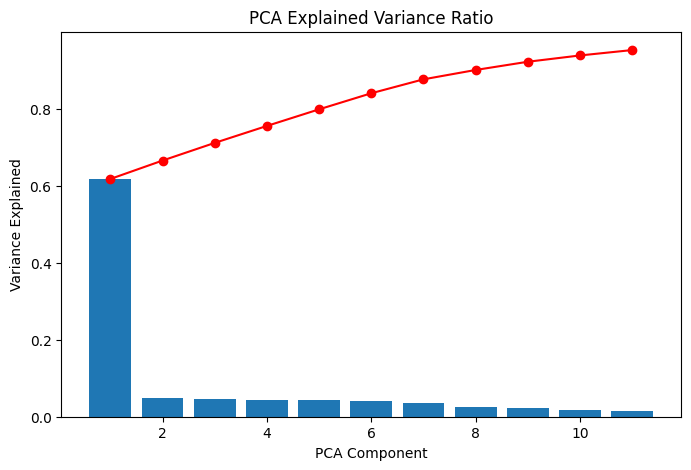

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), color='red', marker='o')
plt.xlabel("PCA Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance Ratio")
plt.show()
